<a href="https://colab.research.google.com/github/Heartech-Hridaya/AI-and-Its-Applications/blob/main/Hridaya_Wine_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Wine Quality Dataset**

##**Data Loading**##

In [40]:

# First and fore most dataset zip download garney then extract then upload in drive then
#navigate to drive/MyDrive/NetflixOriginal.csv   then copy path

#import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#paste the copied path here yeta we used encoding='latin1' to avoid UnicodeDecodeError
df = pd.read_csv("/content/drive/MyDrive/WineQT.csv", encoding='latin1')

#aba check if the dataset is loaded sucessfully by printing the first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


##**EDA**##

##**Data Exploration**##


In [3]:
#Data Profiling
# data kasto xa ani columns haru ko data-type bujhne
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


From the `df.info()` output, we can observe that the dataset contains 1,143 rows and 13 columns, all of which are fully populated with no missing values. This is a good sign, as it means no data imputation is necessary. Most of the columns are of type `float64`, indicating they are numerical features, while two columns—`quality` and `Id`—are of type `int64`. The `quality` column represents the target variable, which is an integer score assigned to the wine, typically ranging from 0 to 10. The `Id` column appears to be a unique identifier for each row and does not contribute meaningful information for analysis or modeling; therefore, it can be safely dropped. Overall, the dataset is clean, entirely numeric, and ready for further analysis and visualization steps like correlation analysis, feature distribution, and relationship exploration with the target variable.


In [4]:
#hamro sabai numeric columns ko statistical measures haru
#find out garne (descriptive statistics)

print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

From the `df.describe()` output, we can draw several insights into the distribution and variability of the features. Most variables, such as `residual sugar`, `free sulfur dioxide`, and `total sulfur dioxide`, show a notable gap between their maximum and 75th percentile values, indicating the presence of potential outliers or skewed distributions. For instance, `residual sugar` has a maximum of 15.5 while its 75th percentile is only 2.6, suggesting a few samples have very high sugar content. Similarly, `total sulfur dioxide` ranges up to 289, far above its mean of \~45.9. The `alcohol` feature shows a relatively wide range (8.4 to 14.9), and higher alcohol levels often correlate positively with better wine quality, which may be worth exploring further. The `sulphates` feature also shows some high values (up to 2.0) beyond its 75th percentile of 0.73, which might impact preservation and taste. The `pH` values are centered around 3.31, consistent with acidic wine, but also vary from 2.74 to 4.01, indicating different levels of acidity among the samples. These descriptive statistics suggest that several features might need outlier handling or transformation before modeling, and they also hint at which features could be most informative when related to the target variable `quality`.


In [5]:
print(df.value_counts())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  Id  
15.9           0.360             0.65         7.5             0.096      22.0                 71.0                  0.99760  2.98  0.84       14.9     5        652     1
4.6            0.520             0.15         2.1             0.054      8.0                  65.0                  0.99340  3.90  0.56       13.1     4        45      1
4.9            0.420             0.00         2.1             0.048      16.0                 42.0                  0.99154  3.71  0.74       14.0     7        821     1
5.0            0.380             0.01         1.6             0.048      26.0                 60.0                  0.99084  3.70  0.75       14.0     6        1270    1
               0.400             0.50         4.3             0.046      29.0                 80.0                  0.99020  3.49  0.66       13.6     6   

The sample data shows that most entries are complete with consistent column formatting, but some rows have missing values in the `fixed acidity` column. Values across features like `alcohol`, `sulphates`, and `volatile acidity` vary widely, reflecting the diversity in wine samples. The `quality` scores range from 4 to 7 in these samples, indicating moderate wine quality. Additionally, some features like `total sulfur dioxide` and `residual sugar` show high values, hinting at potential outliers or skewed distributions worth investigating further.


In [6]:
# Check total missing values per column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


there are no missing values in any column, so no imputation or data cleaning is needed for missing data.

In [7]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


Duplicate rows vayeko vaye hamile drop garnu parthyo but ahile hamro data consistent nai xa.

##**Data Cleaning**##

In [8]:
# In DSA we do not change the main dsa but make a copy of the main dataset then edit the copy
df_copy = df.copy()

In [9]:
# Check data types of each column
print(df_copy.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [10]:
df_copy[df_copy['pH'] > 14]  # or < 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


No invalid pH values above 14 (which is the maximum possible for pH)

In [11]:
# Alcohol should be within a realistic range for wine
df_copy[df_copy['alcohol'] < 0]  # invalid
df_copy[df_copy['alcohol'] > 20]  # unusually high

# Sulphates
df_copy[df_copy['sulphates'] < 0]  # invalid

# Chlorides
df_copy[df_copy['chlorides'] < 0]  # invalid

# Density should be positive
df_copy[df_copy['density'] <= 0]  # invalid

# Quality scores (if 0–10 scale is used, typically 3–9 in wine data)
df_copy['quality'].value_counts()  # just check if any extreme outliers


,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


Conclusion:

No quality scores below 3 or above 8.

Most wines are rated 5 or 6.

A slight class imbalance exists (may matter in ML), but it's not a data cleaning issue.

These scores are valid; no cleaning needed.

##**Outliers**##

###**Detection**###

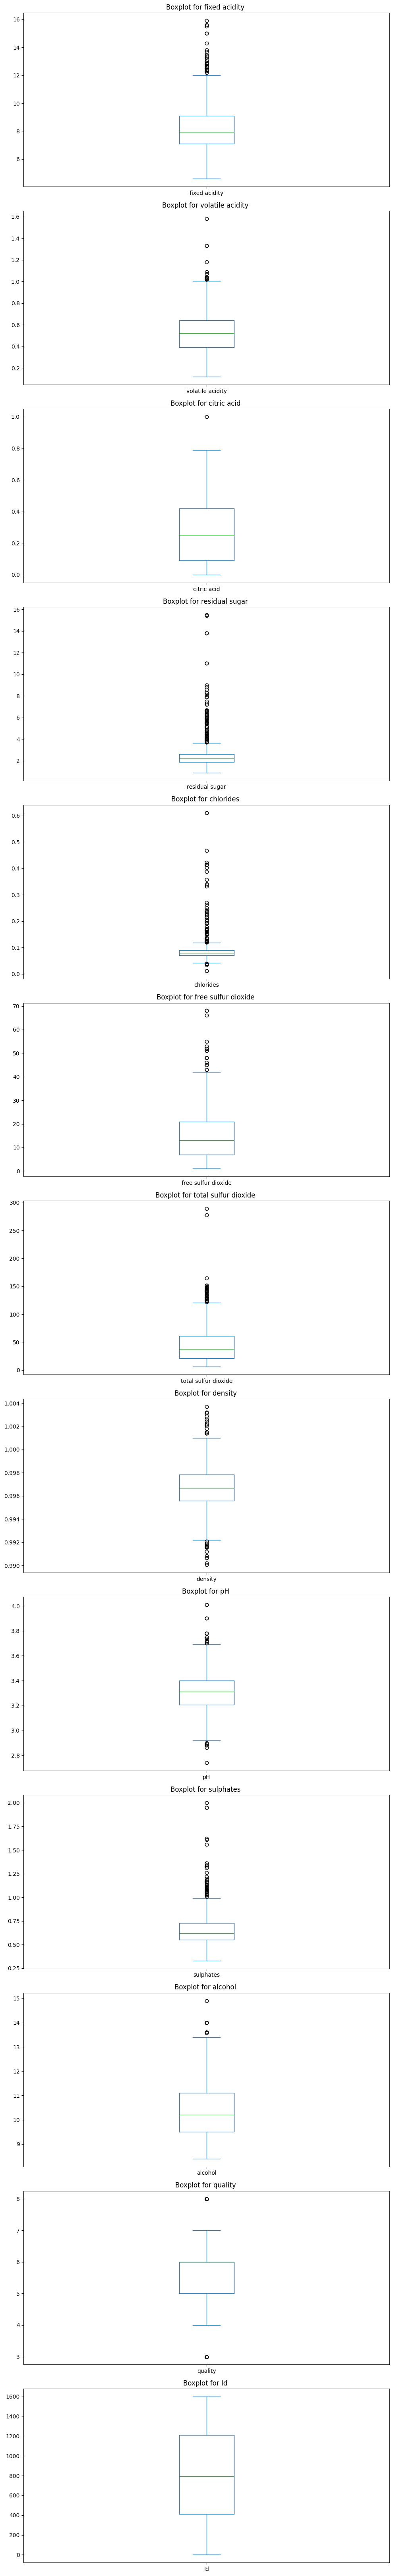

In [13]:
# selects all columns in df_copy that are numeric, and stores them in a new DataFrame called numeric_cols.
numeric_cols = df_copy.select_dtypes(include='number')

# This line creates separate boxplots for each numeric column (e.g., Runtime, IMDB Score)
# sabai numeric columns ko lagi individual boxplots banaucha — eauta eauta plot eauta column ko lagi
# 'subplots=True' le garda each plot afnai subplot ma aaucha
# 'layout=(len(numeric_cols.columns), 1)' le vertical layout banaune (one plot per row)
# 'figsize=(10, 5 * len(numeric_cols.columns))' le graph size set garcha depending on number of columns
# 'sharex=False' le x-axis haru lai independent banaune (not shared)
# 'color=blue' le boxplot ko line color blue banaune
# 'patch_artist=True' le fill color allow garcha box ma
# 'title=[...]' le har eauta subplot ko title set garcha (e.g., "Boxplot for Runtime")

numeric_cols.plot(kind='box', subplots=True, layout=(len(numeric_cols.columns), 1),
                  figsize=(10, 5 * len(numeric_cols.columns)), sharex=False,
                   title=[f'Boxplot for {col} ' for col in numeric_cols.columns])

plt.tight_layout()
plt.show()

###**Handeling**###

In [14]:
# Columns to check for outliers (exclude 'Id' and 'quality')
cols_to_check = df_copy.columns.difference(['Id', 'quality'])

# Create a copy to avoid changing original while filtering
df_clean = df_copy.copy()

for col in cols_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within bounds for this column
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Original shape: {df_copy.shape}")
print(f"New shape after outlier removal: {df_clean.shape}")


Original shape: (1143, 13)
New shape after outlier removal: (813, 13)


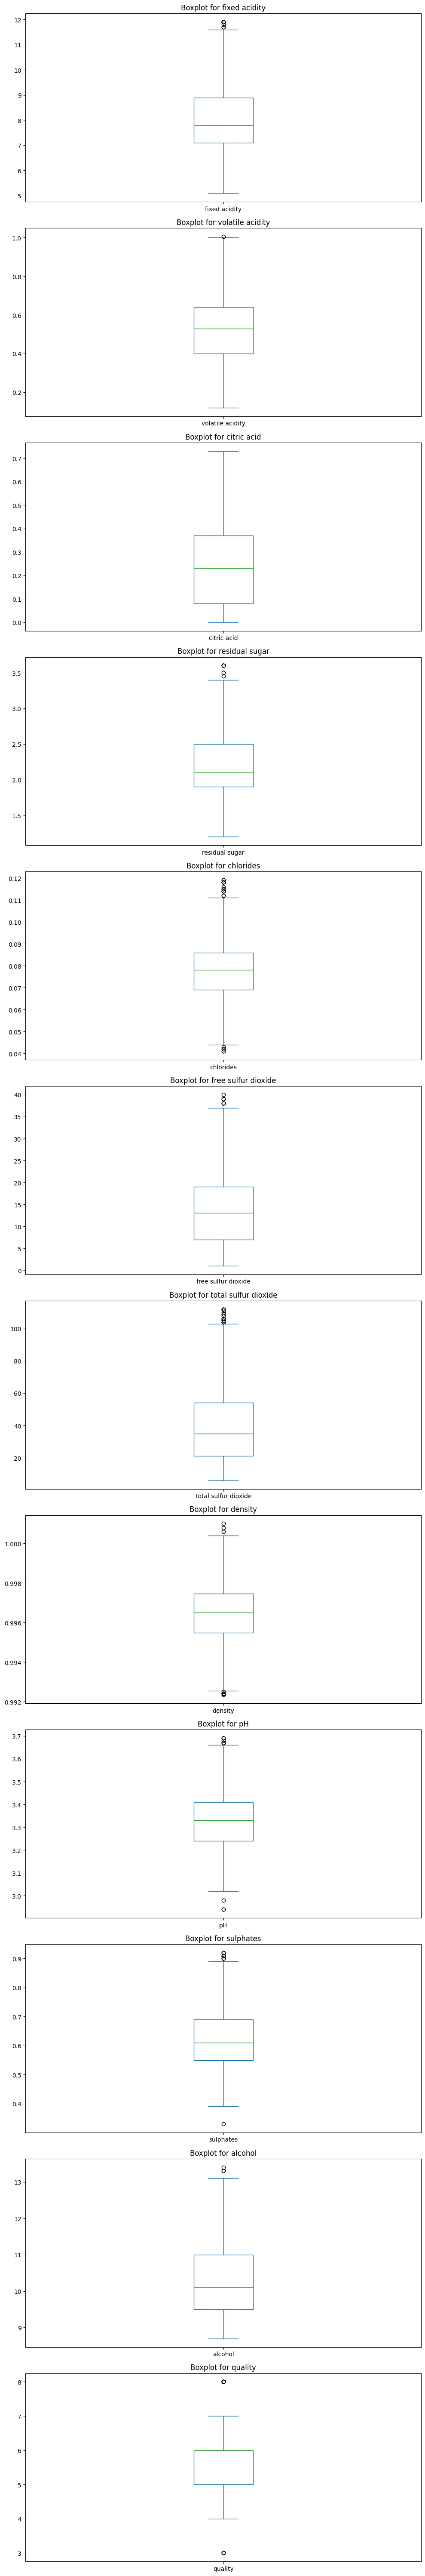

In [16]:
# Select numeric columns except 'Id'
numeric_cols = df_clean.select_dtypes(include='number').drop(columns=['Id'])

# Plot boxplots, one per numeric column
numeric_cols.plot(kind='box', subplots=True, layout=(len(numeric_cols.columns), 1),
                  figsize=(10, 5 * len(numeric_cols.columns)), sharex=False,
                  title=[f'Boxplot for {col}' for col in numeric_cols.columns])

plt.tight_layout()
plt.show()

##**Feature Engneering**##

**Creating New Ratio and Combined Features**

In [22]:
# Create new engineered features
df_copy['Acid_Ratio'] = df_copy['volatile acidity'] / df_copy['fixed acidity']
df_copy['Sulfur_Ratio'] = df_copy['free sulfur dioxide'] / df_copy['total sulfur dioxide']
df_copy['Sugar_Alcohol_Ratio'] = df_copy['residual sugar'] / df_copy['alcohol']
df_copy['Total_Acidity'] = df_copy['fixed acidity'] + df_copy['volatile acidity'] + df_copy['citric acid']

# Display the updated DataFrame with new features
df_copy[['Acid_Ratio',
         'Sulfur_Ratio',
          'Sugar_Alcohol_Ratio',
         'Total_Acidity','chlorides','density','pH','sulphates','quality']].head()


,Acid_Ratio,Sulfur_Ratio,Sugar_Alcohol_Ratio,Total_Acidity,chlorides,density,pH,sulphates,quality
0,0.094595,0.323529,0.202128,8.10,0.076,0.9978,3.51,0.56,5
1,0.112821,0.373134,0.265306,8.68,0.098,0.9968,3.20,0.68,5
2,0.097436,0.277778,0.234694,8.60,0.092,0.9970,3.26,0.65,5
3,0.025000,0.283333,0.193878,12.04,0.075,0.9980,3.16,0.58,6
4,0.094595,0.323529,0.202128,8.10,0.076,0.9978,3.51,0.56,5


These new features help capture more meaningful relationships:

Acid Ratio reveals how strong the volatile (vinegar-like) component is compared to total fixed acids.

Sulfur Ratio shows the preservation efficiency-high free sulfur relative to total is desirable.

Sugar-Alcohol Ratio helps distinguish between dry and sweet wines.

Total Acidity gives a clearer picture of overall acidity, which heavily influences taste and quality.

These engineered features can improve the predictive power of your machine learning models.

<ipython-input-25-3008679809>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='Acid_Ratio', data=df_copy, palette='Blues')
<ipython-input-25-3008679809>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='Sulfur_Ratio', data=df_copy, palette='Purples')
<ipython-input-25-3008679809>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='Sugar_Alcohol_Ratio', data=df_copy, palette='Oranges')
<ipython-input-25-3008679809>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

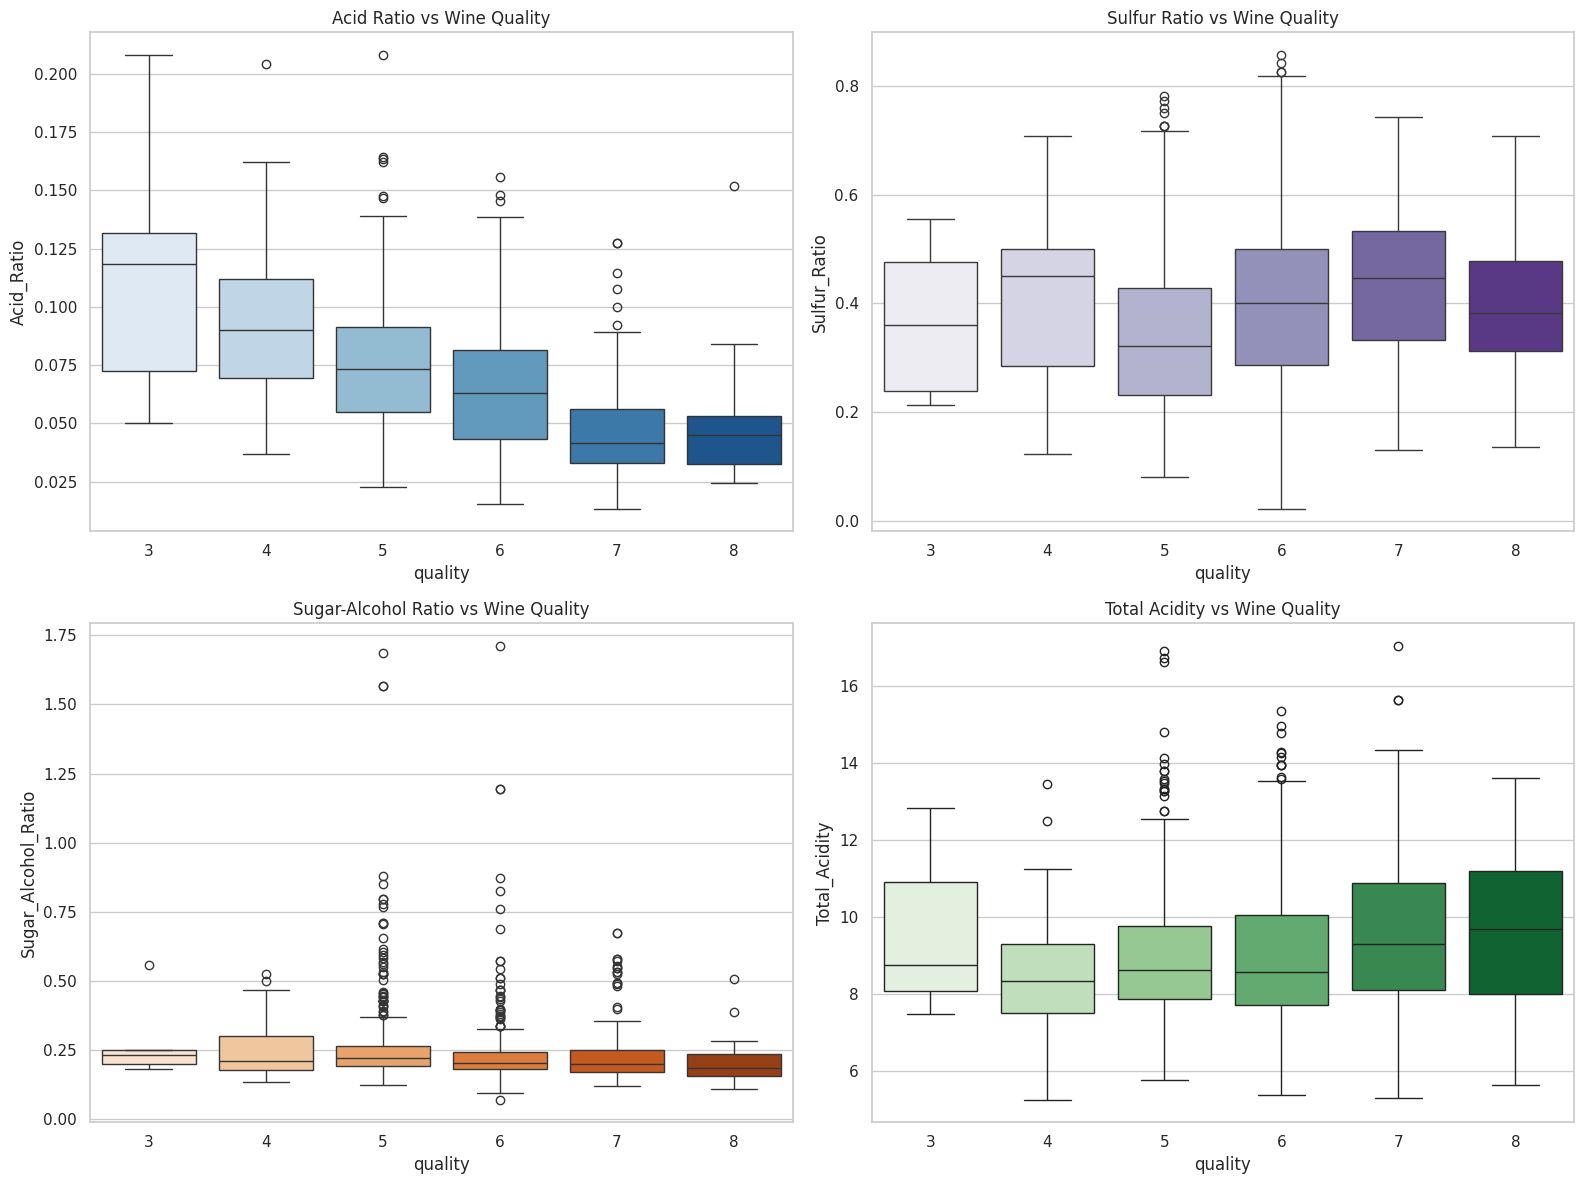

In [25]:
# Set the plotting style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

# Acid_Ratio vs Quality
plt.subplot(2, 2, 1)
sns.boxplot(x='quality', y='Acid_Ratio', data=df_copy, palette='Blues')
plt.title('Acid Ratio vs Wine Quality')

# Sulfur_Ratio vs Quality
plt.subplot(2, 2, 2)
sns.boxplot(x='quality', y='Sulfur_Ratio', data=df_copy, palette='Purples')
plt.title('Sulfur Ratio vs Wine Quality')

# Sugar_Alcohol_Ratio vs Quality
plt.subplot(2, 2, 3)
sns.boxplot(x='quality', y='Sugar_Alcohol_Ratio', data=df_copy, palette='Oranges')
plt.title('Sugar-Alcohol Ratio vs Wine Quality')

# Total_Acidity vs Quality
plt.subplot(2, 2, 4)
sns.boxplot(x='quality', y='Total_Acidity', data=df_copy, palette='Greens')
plt.title('Total Acidity vs Wine Quality')

plt.tight_layout()
plt.show()

Median line position: Higher median = better quality.

Spread: Wider box = more variability.

Outliers: Can show rare or exceptional quality wines.

**Binning**

In [23]:
# Binning pH into categories
df_copy['pH_Category'] = pd.cut(df_copy['pH'], bins=[2.5, 3.0, 3.4, 3.9, 4.5],
                                labels=['Very Low', 'Low', 'Moderate', 'High'])


<ipython-input-24-4246786121>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pH_Category', y='quality', data=df_copy, palette='Greens')


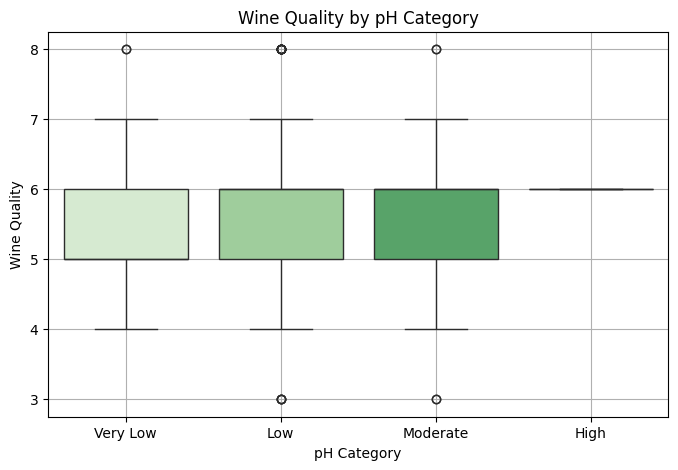

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='pH_Category', y='quality', data=df_copy, palette='Greens')
plt.title('Wine Quality by pH Category')
plt.xlabel('pH Category')
plt.ylabel('Wine Quality')
plt.grid(True)
plt.show()

 We are trying to spot patterns between acidity level (pH) and wine quality does quality improve or worsen with more acidic wines? A boxplot gives a clear visual answer.

**Interaction Feature**

In [26]:
df_copy['Alcohol_Sulphates_Interaction'] = df_copy['alcohol'] * df_copy['sulphates']


Interaction features help expose relationships between variables that individually seem weak but together have strong predictive power. This boosts both model accuracy and insight quality.

<Axes: xlabel='quality', ylabel='Alcohol_Sulphates_Interaction'>

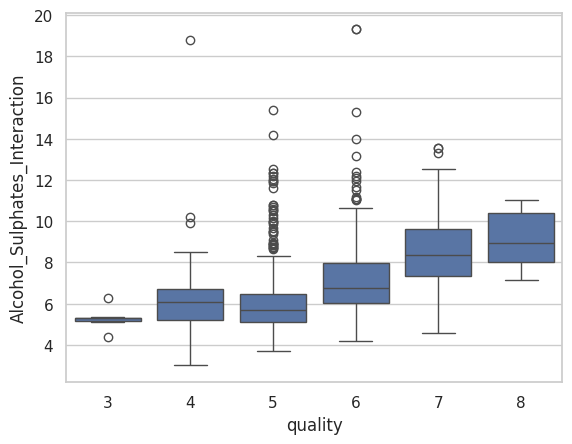

In [27]:
sns.boxplot(x='quality', y='Alcohol_Sulphates_Interaction', data=df_copy)


The boxplot indicates a positive correlation between the Alcohol_Sulphates_Interaction feature and wine quality. Higher quality wines generally have higher interaction values, meaning the combined effect of alcohol strength and sulphate preservation plays a key role in producing better wines. However, high variability and outliers also suggest this feature alone doesn't guarantee high quality it likely interacts with other factors too.

**Binary target**

In [28]:
df_copy['isHighQuality'] = (df_copy['quality'] >= 6).astype(int)

Creating a binary target simplifies your task, improves model interpretability, and aligns better with many classification algorithms and evaluation metrics.

<ipython-input-29-3810673750>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isHighQuality', data=df_copy, palette=['salmon', 'lightgreen'])


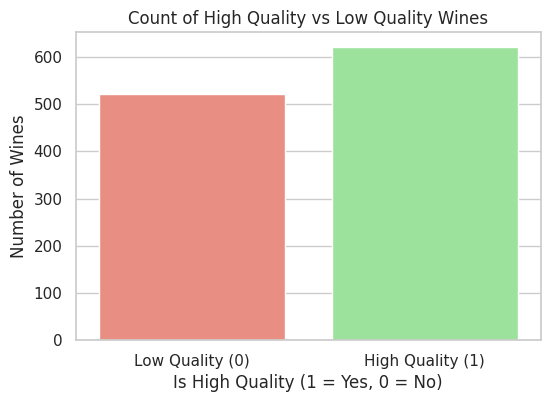

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='isHighQuality', data=df_copy, palette=['salmon', 'lightgreen'])
plt.title('Count of High Quality vs Low Quality Wines')
plt.xlabel('Is High Quality (1 = Yes, 0 = No)')
plt.ylabel('Number of Wines')
plt.xticks([0, 1], ['Low Quality (0)', 'High Quality (1)'])
plt.show()

It clearly shows class balance or imbalance between the two categories.

Helps us quickly to check if we have enough samples in both classes to train a model.

Simple and intuitive for stakeholders and modelers alike.

##**Visualization**##

**Histograms + Boxplots**

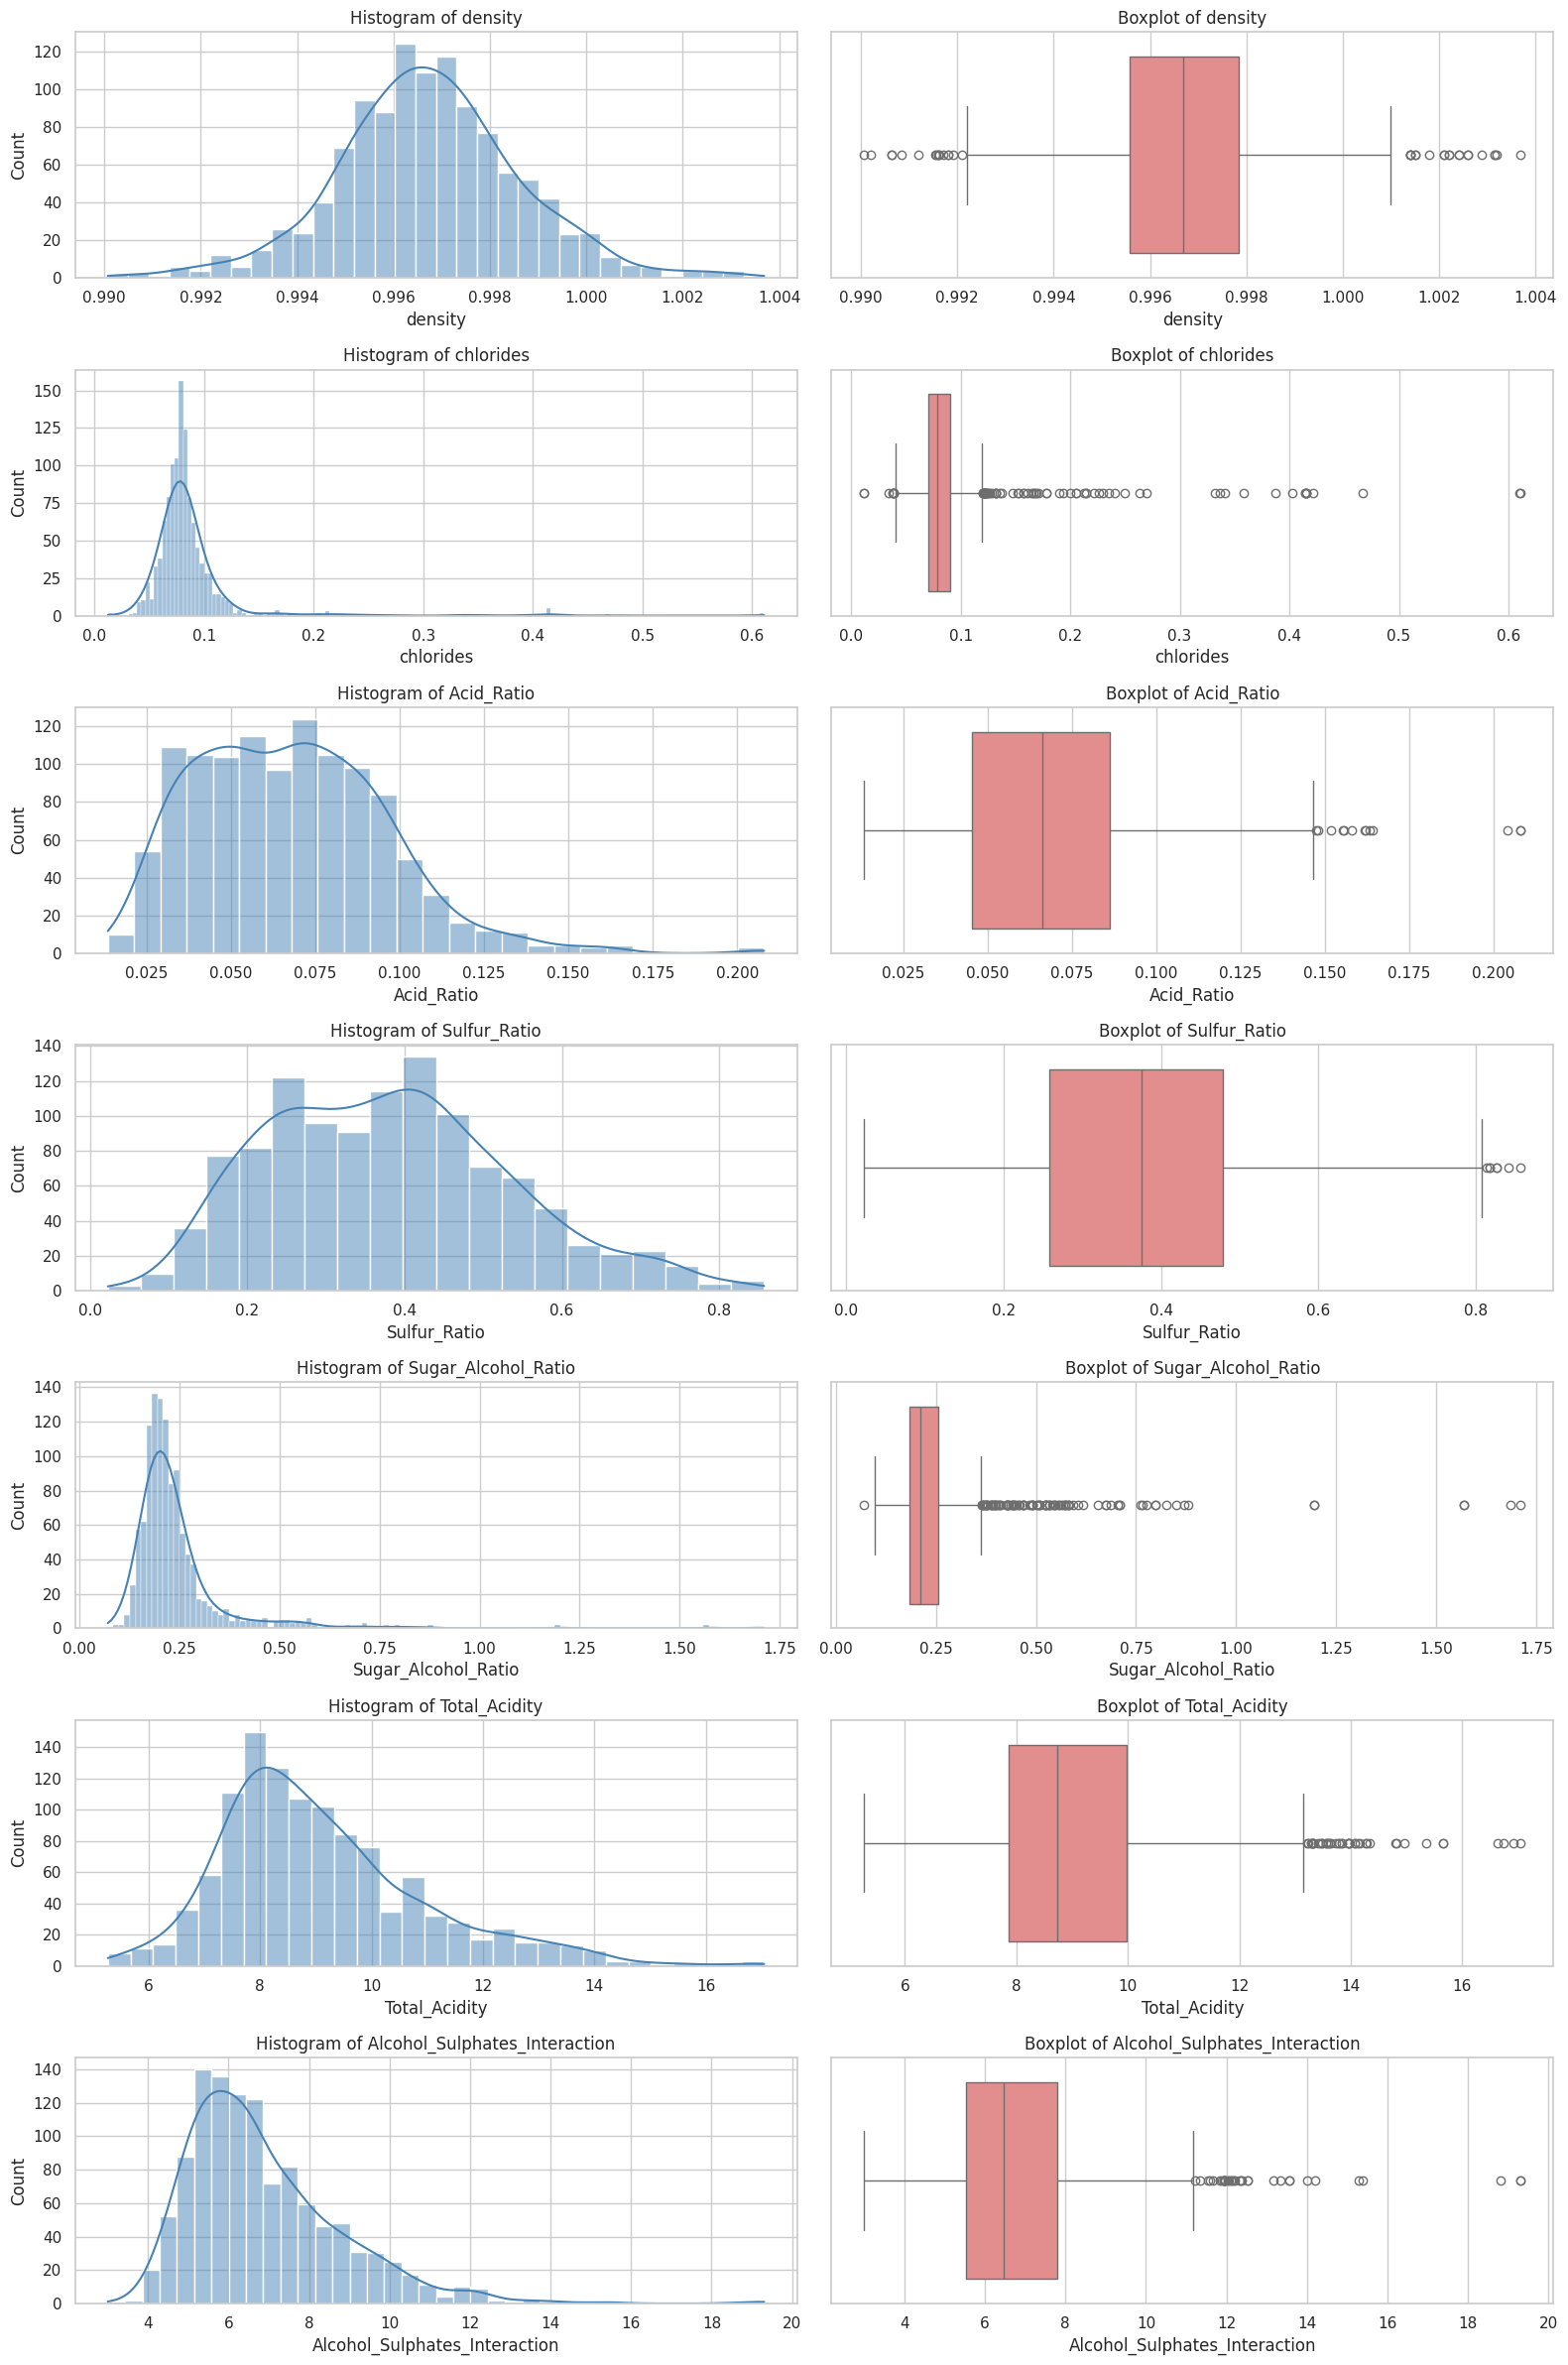

In [30]:
numeric_features = ['density', 'chlorides', 'Acid_Ratio', 'Sulfur_Ratio',
                    'Sugar_Alcohol_Ratio', 'Total_Acidity', 'Alcohol_Sulphates_Interaction']

plt.figure(figsize=(16, 24))

# Numeric features: histogram + boxplot
for i, col in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 2, 2*i - 1)
    sns.histplot(df_copy[col], kde=True, color='steelblue')
    plt.title(f'Histogram of {col}')

    plt.subplot(len(numeric_features), 2, 2*i)
    sns.boxplot(x=df_copy[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



<ipython-input-33-3620406947>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[col], palette='pastel')
<ipython-input-33-3620406947>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[col], palette='pastel')


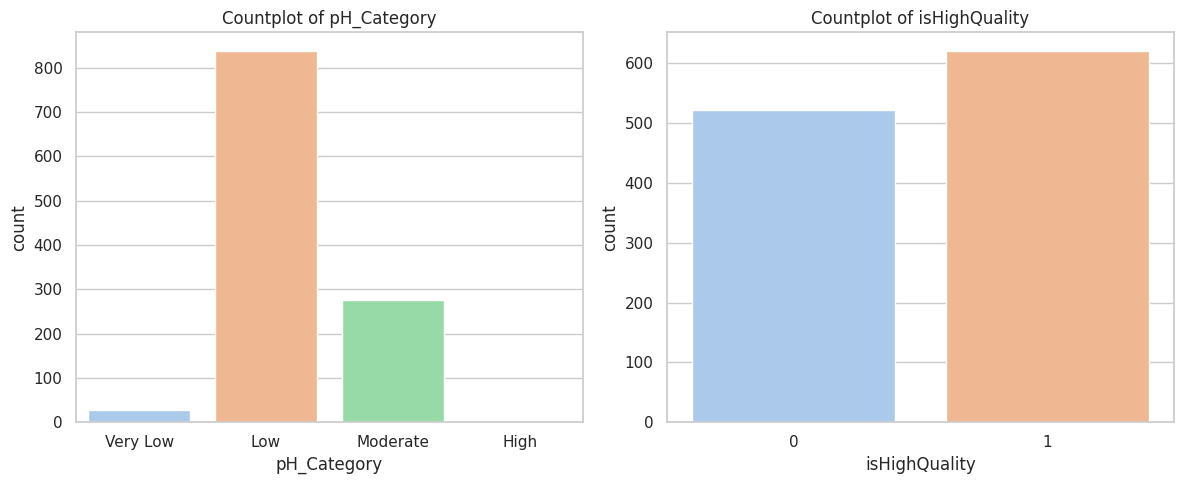

In [33]:
# Categorical features: countplots
categorical_features = ['pH_Category', 'isHighQuality']
plt.figure(figsize=(12,5))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(x=df_copy[col], palette='pastel')
    plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


**Correlation Heatmap**

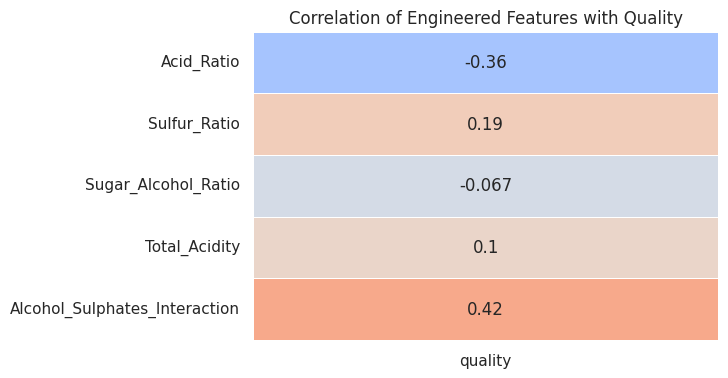

In [35]:
# Engineered features list
engineered_features = ['Acid_Ratio', 'Sulfur_Ratio', 'Sugar_Alcohol_Ratio', 'Total_Acidity', 'Alcohol_Sulphates_Interaction']


# Calculate correlation matrix for engineered features + quality
corr_subset = df_copy[engineered_features + ['quality']].corr()

# We only want to show correlations of engineered features with quality (last column)
corr_with_quality = corr_subset.loc[engineered_features, ['quality']]

plt.figure(figsize=(6, 4))
sns.heatmap(corr_with_quality, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, linewidths=0.5)
plt.title('Correlation of Engineered Features with Quality')
plt.show()


**Scatter plots / Pair plots for engineered features and key original features**

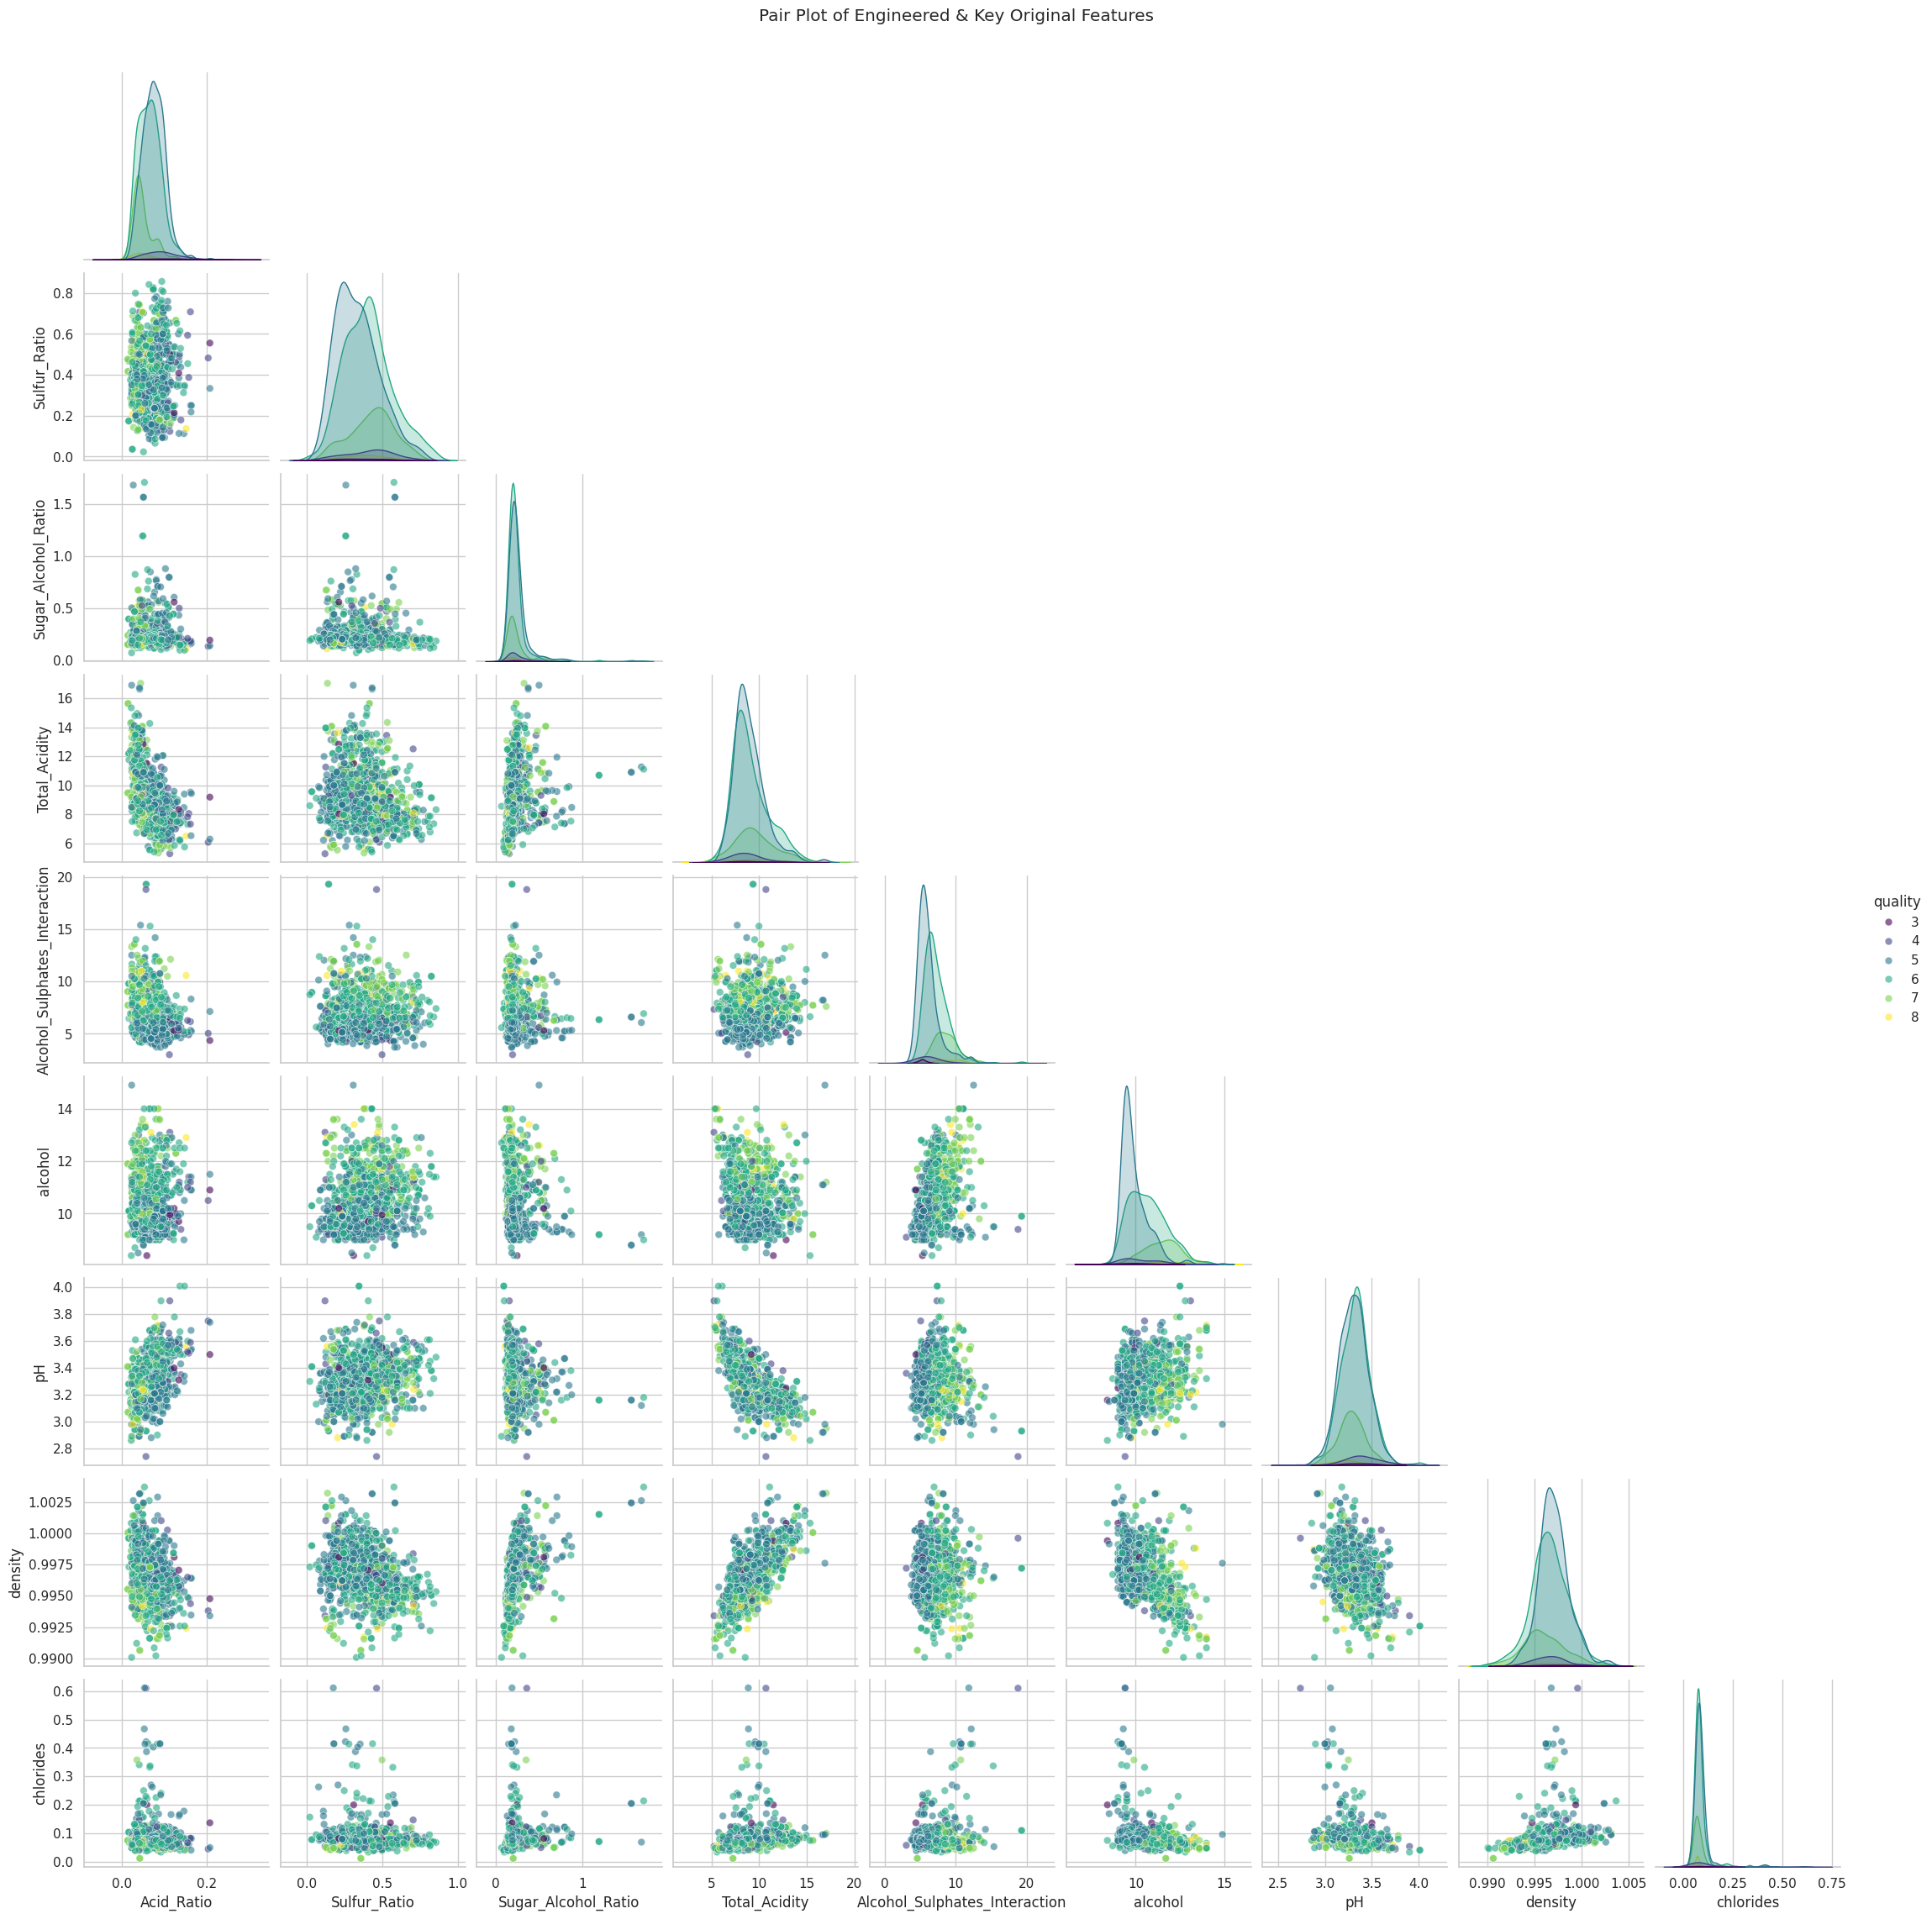

In [36]:
# Features to include in pairplot
features_for_pairplot = [
    'Acid_Ratio', 'Sulfur_Ratio', 'Sugar_Alcohol_Ratio', 'Total_Acidity', 'Alcohol_Sulphates_Interaction',
    'alcohol', 'pH', 'density', 'chlorides', 'quality'
]

# Pairplot with quality as hue (color)
sns.pairplot(df_copy[features_for_pairplot], hue='quality', palette='viridis', corner=True, plot_kws={'alpha':0.6, 's':40})
plt.suptitle('Pair Plot of Engineered & Key Original Features', y=1.02)
plt.show()

**Boxplots  of features grouped by qualit**

<ipython-input-41-953218398>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df_copy, palette='Set3')
<ipython-input-41-953218398>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df_copy, palette='Set3')
<ipython-input-41-953218398>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df_copy, palette='Set3')
<ipython-input-41-953218398>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

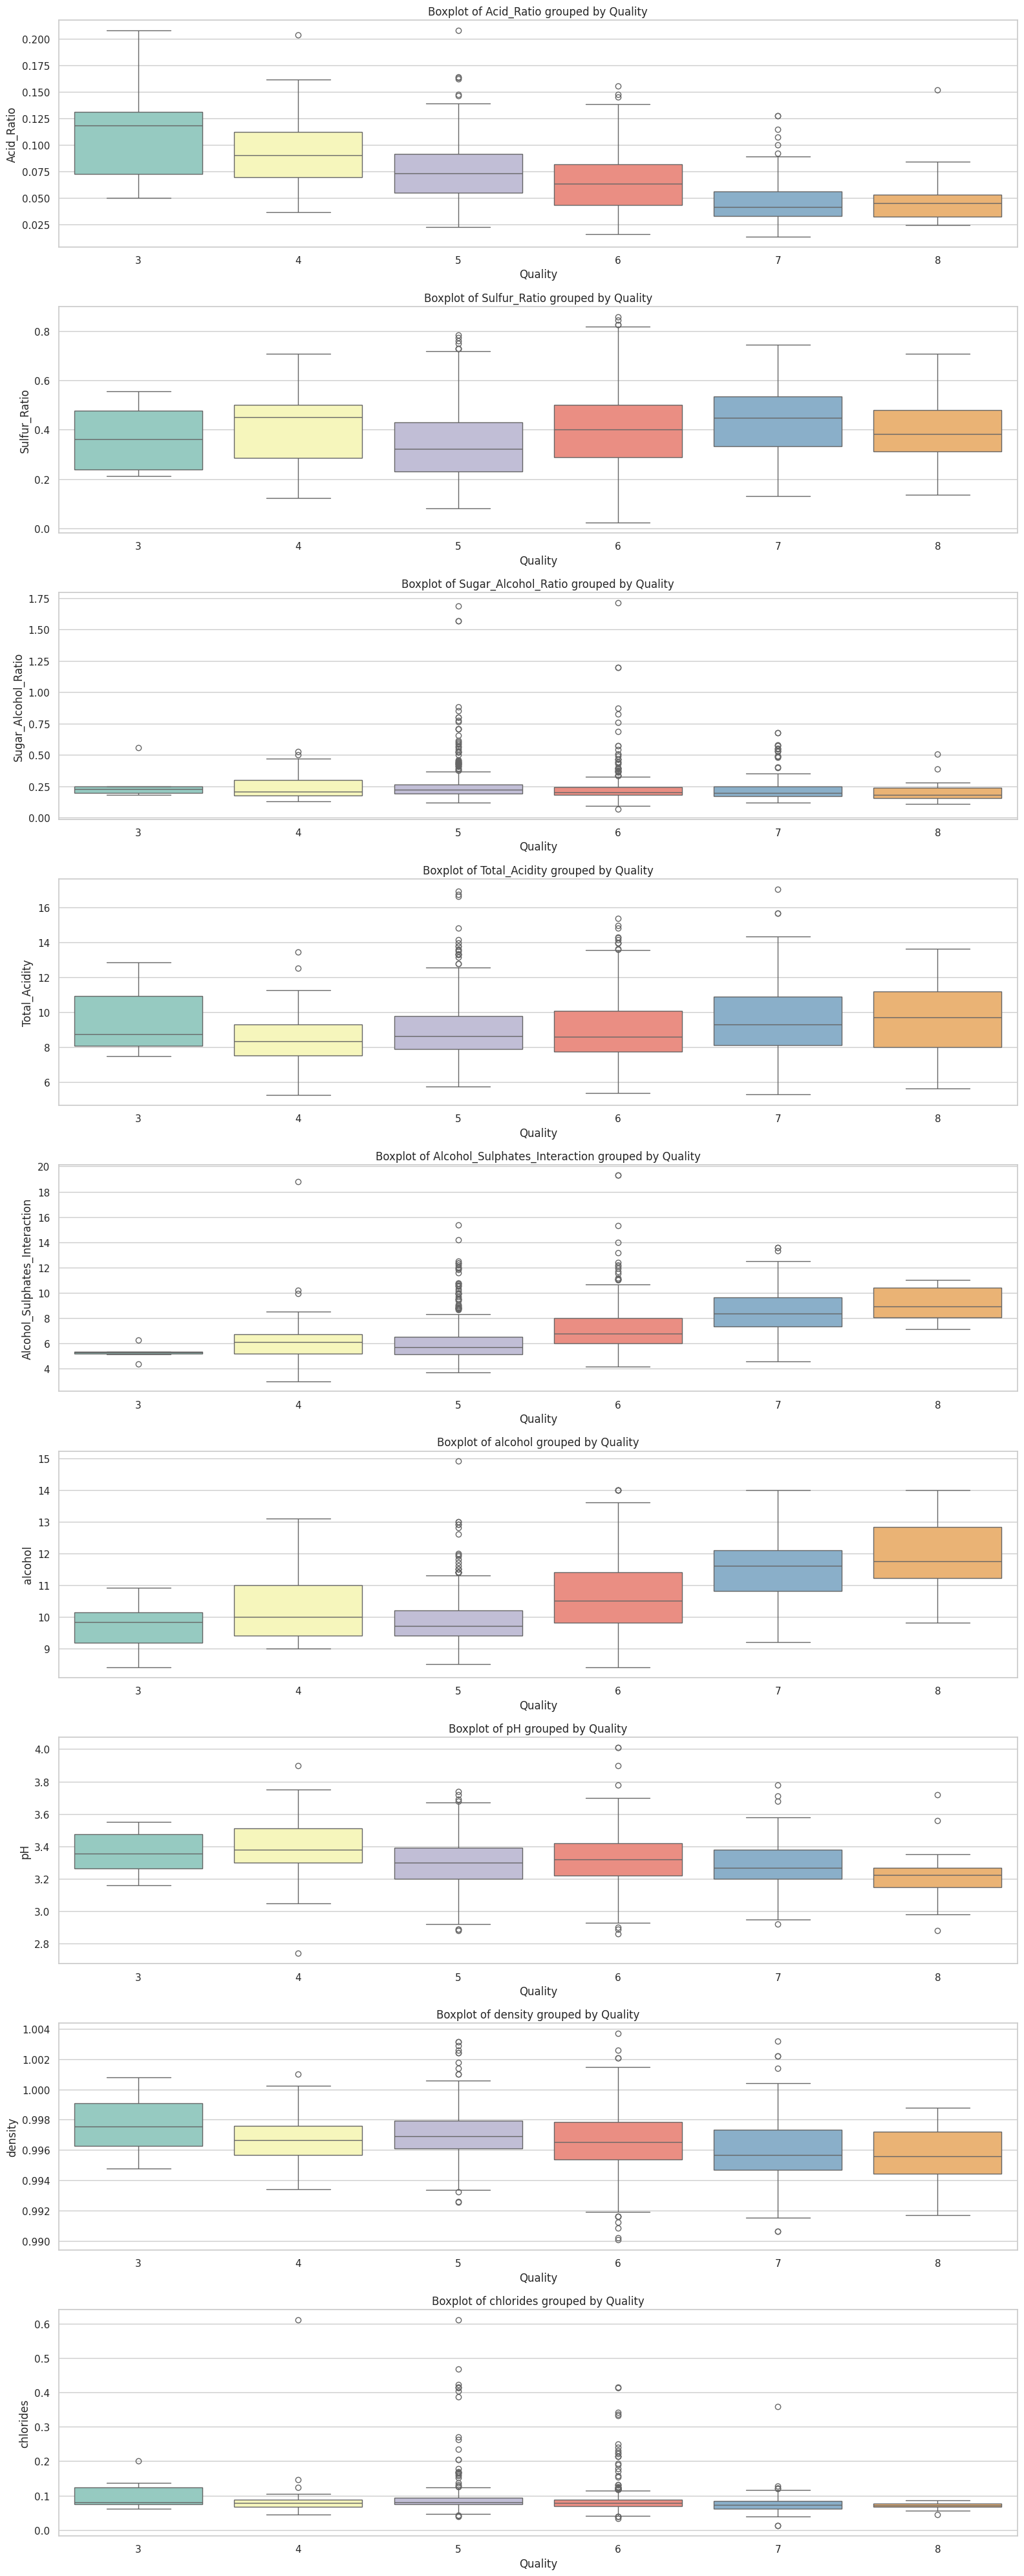

In [41]:
features_to_boxplot = [
    'Acid_Ratio', 'Sulfur_Ratio', 'Sugar_Alcohol_Ratio', 'Total_Acidity', 'Alcohol_Sulphates_Interaction',
    'alcohol', 'pH', 'density', 'chlorides'
]

plt.figure(figsize=(16, 40))

for i, col in enumerate(features_to_boxplot, 1):
    plt.subplot(len(features_to_boxplot), 1, i)
    sns.boxplot(x='quality', y=col, data=df_copy, palette='Set3')
    plt.title(f'Boxplot of {col} grouped by Quality')
    plt.xlabel('Quality')
    plt.ylabel(col)

plt.tight_layout()
plt.show()